In [1]:
# tests for points routines
#2018/02/16 from v1. this is test documentation for points module,
# also used as a test on how to generate documentation from notebook 
# with sphinx
# kernel must be reset and output cleared before use or before running
# sphinx (unless you know what you are doing).

## TODO 
# - sphinxuse _build for intermediate files (move to docs\_build)
# but savae output in docs(or move it there).
# - hide parts of code, add doc string above commands.
# - save the results in the noteook (this anyway will prevent 
#   future executions, so maybe make a copy or a script to clear output
#   when sphinx is called).

#%reset
#%load_ext autoreload
#%autoreload 2

import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

from pySurf.points import *
import os
#from calibrate_align import *
from dataIO.fn_add_subfix import fn_add_subfix


In [2]:
#avoid the annoying inline figures 
%matplotlib qt 

from IPython.display import display
plt.ioff()

In [3]:
#%qtconsole
plt.close('all')

In [4]:
infolder=r'input_data\profilometer\04_test_directions'
#outfolder=r'test\profilometer_scans\04_test_directions_output'
outfolder=r'results\test_points'
testfiles=['05_xysurf_pp_Intensity.txt','06_xysurf_pm_Intensity.txt','07_xysurf_mp_Intensity.txt',
          '08_xysurf_mm_Intensity.txt','09_yxsurf_pp_Intensity.txt','10_yxsurf_pm_Intensity.txt',
          '11_yxsurf_mp_Intensity.txt','12_yxsurf_mm_Intensity.txt']
#definition for subplots
n=len(testfiles)
a = np.floor(n**0.5).astype(int) #nr of plots on horizontal
b = np.ceil(1.*n/a).astype(int) #nr of plots on vertical 

In [5]:
pwd

'C:\\Users\\Vincenzo\\Google Drive\\libraries\\python\\userKov3\\pySurf\\test\\cane'

In [6]:
from pySurf.points import plot_points

def pp(*args,**kwargs):
    figManager = plt.get_current_fig_manager()
    figManager.window.showMaximized()
    return plot_points(*args,**kwargs)

def maximize_plot_function(func):
    def f(*args,**kwargs):
        result=func(*args,**kwargs)
        figManager = plt.get_current_fig_manager()
        figManager.window.showMaximized()
        plt.tight_layout()
        return result
    return f

def test_maximize():
    ff=maximize_plot_function(plot_points)
    ff(pts)
    plt.figure()
    ff2=maximize_plot_function(plot_data)
    ff2(*points_autoresample(pts))


plt.figure=maximize_plot_function(plt.figure)

In [7]:
plt.close('all')

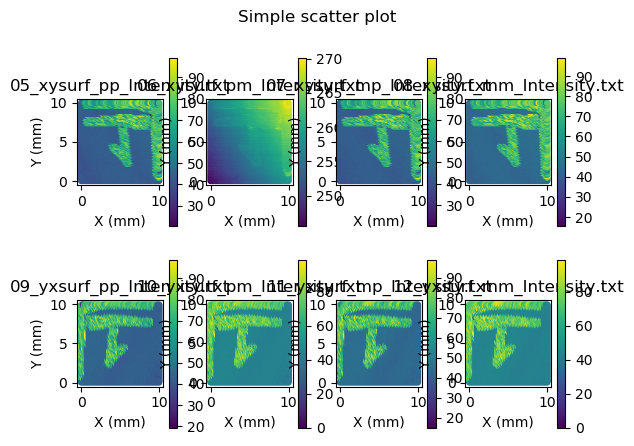

In [8]:
m_pts=[]
fig=plt.figure(1)
plt.clf()
plt.suptitle('Simple scatter plot')

for i,f in enumerate(testfiles):
    pts=get_points(os.path.abspath(os.path.join(infolder,f)),delimiter=',')
    m_pts.append(pts)
    fig.add_subplot(a,b,i+1)
    plot_points(pts,scatter=True,aspect='equal')
    plt.title(f)
plt.show()
plt.savefig(os.path.join(outfolder,'01_scatterPlot.png'))
display(plt.gcf())

resampling...
resampling...
resampling...
resampling...
resampling...
resampling...
resampling...
resampling...


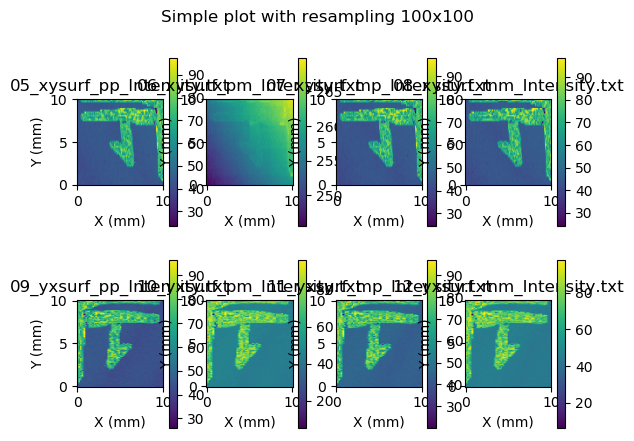

In [9]:
m_pts=[]
fig=plt.figure(2)
plt.clf()
plt.suptitle('Simple plot with resampling 100x100')

for i,f in enumerate(testfiles):
    pts=get_points(os.path.join(infolder,f),delimiter=',')
    m_pts.append(pts)
    fig.add_subplot(a,b,i+1)
    plot_points(pts,aspect='equal',shape=(100,100))
    plt.title(f)
plt.show()
plt.savefig(os.path.join(outfolder,'02_simplePlot.png'))
display(plt.gcf())

resampling...
resampling...
resampling...
resampling...
resampling...
resampling...
resampling...
resampling...


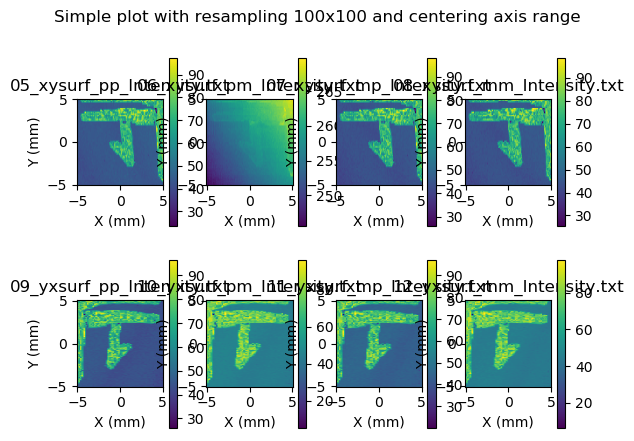

In [10]:
m_pts=[]
fig=plt.figure(3)
plt.clf()
plt.suptitle('Simple plot with resampling 100x100 and centering axis range')

for i,f in enumerate(testfiles):
    pts=get_points(os.path.join(infolder,f),delimiter=',',center=(0,0))
    m_pts.append(pts)
    fig.add_subplot(a,b,i+1)
    plot_points(pts,aspect='equal',shape=(100,100))
    plt.title(f)
plt.show()
plt.savefig(os.path.join(outfolder,'03_simplePlotCenter.png'))
display(plt.gcf())

resampling...
resampling...
resampling...
resampling...
resampling...
resampling...
resampling...
resampling...


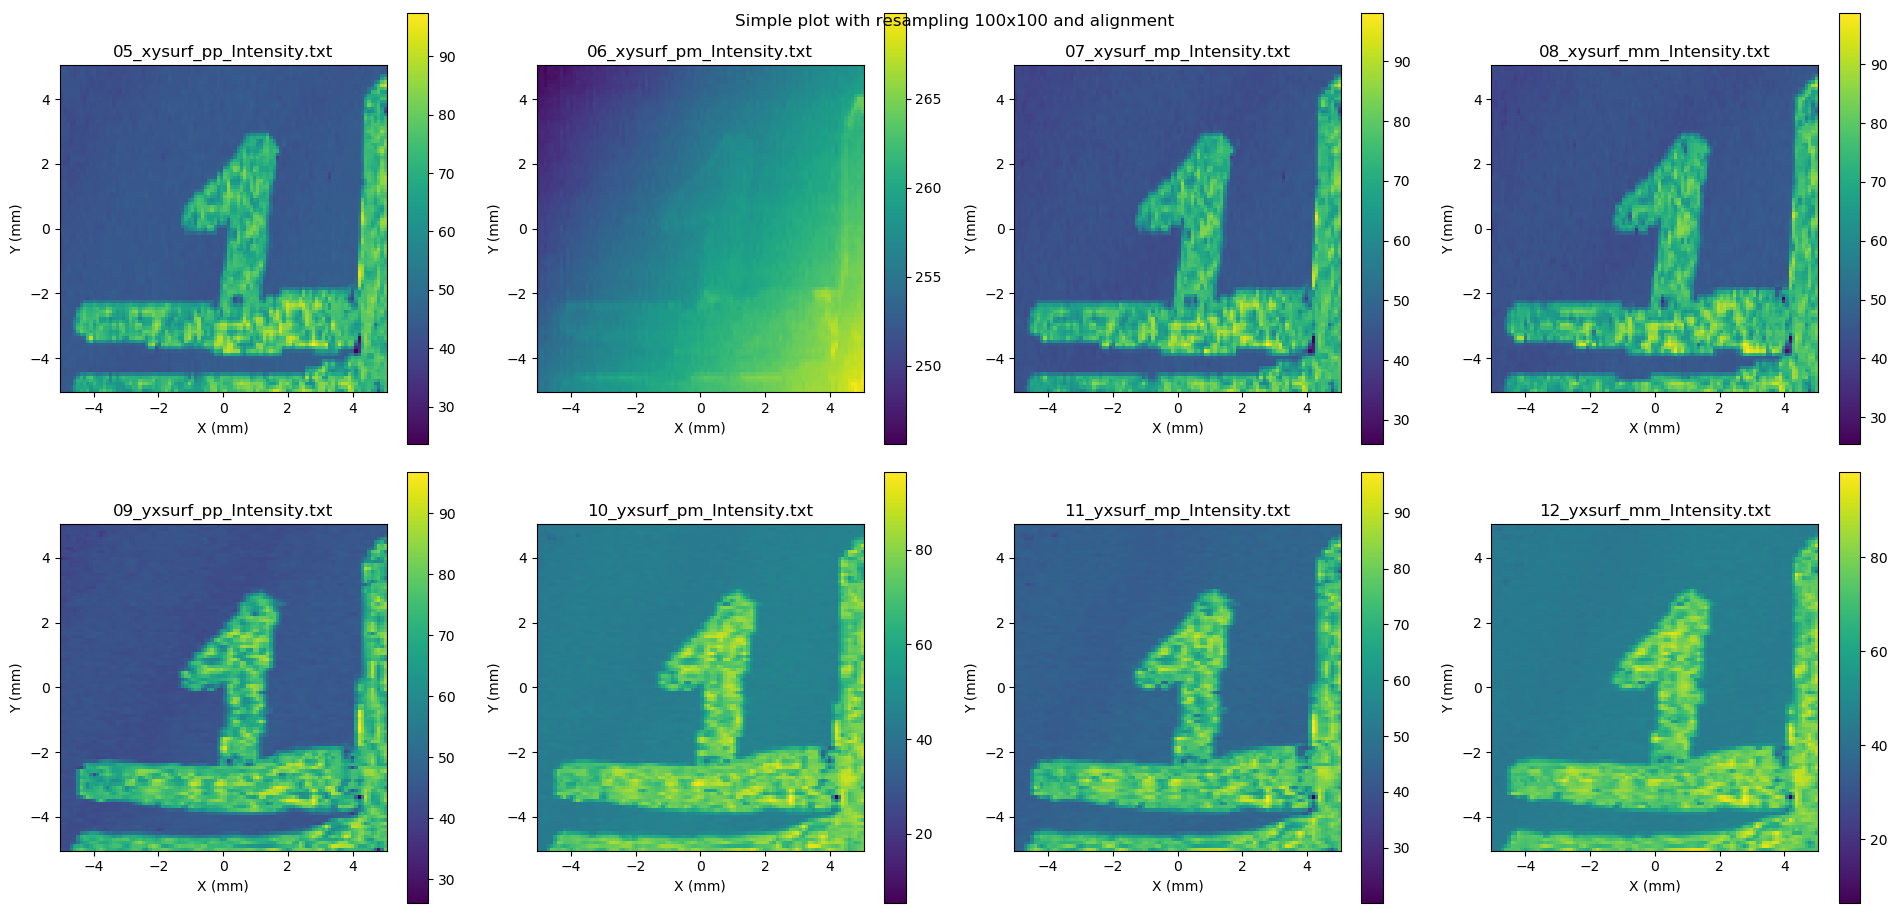

In [11]:
#test alignment and writing matrix

m_pts=[]
fig=plt.figure(3)
plt.clf()
plt.suptitle('Simple plot with resampling 100x100 and alignment')

for i,f in enumerate(testfiles):
    if i<=3:
        s=(1.,-1,1.) #x fast scanning
    else:
        s=(-1.,-1,1.) #y fast scanning
    pts=get_points(os.path.join(infolder,f),delimiter=',',center=(0,0),scale=s)
    save_points(os.path.join(outfolder,fn_add_subfix(f,'_matrix')),pts,matrix=True,shape=(100,100))
    m_pts.append(pts)
    fig.add_subplot(a,b,i+1)
    plot_points(pts,aspect='equal',shape=(100,100))
    plt.title(f)
plt.show()
plt.savefig(os.path.join(outfolder,'03_simplePlotCenter.png'))
display(plt.gcf())

In [12]:
xr,yr=span(pts[:,0]),span(pts[:,1])

resampling...
resampling...
resampling...
resampling...
resampling...
resampling...
resampling...
resampling...


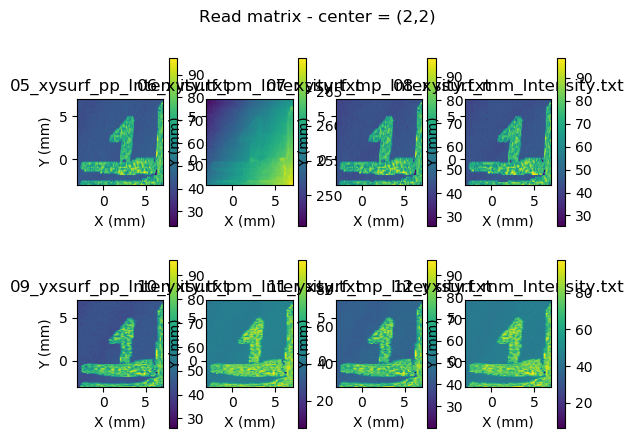

In [13]:
#test reading matrix and alignment. If range is not provided matrix index is
#  used, otherwise range is used and translated so that center of image has coordinates center. 

m_pts=[]
fig=plt.figure(4)
plt.clf()
plt.suptitle('Read matrix - center = (2,2)')

for i,f in enumerate(testfiles):
    pts=get_points(os.path.join(outfolder,fn_add_subfix(f,'_matrix')),center=(2,2),matrix=1,
                  addaxis=True,x=xr,y=yr,delimiter=' ') #default delimiter is ','
    m_pts.append(pts)
    fig.add_subplot(a,b,i+1)
    plot_points(pts,aspect='equal',shape=(100,100))
    plt.title(f)
plt.show()
plt.savefig(os.path.join(outfolder,'04_simplePlotCenter.png'))
display(plt.gcf())

In [14]:
#%qtconsole

In [15]:
#test on a single set of points. Points are put in random order and 
# data are plotted

s=(1.,-1,1.) #x fast scanning
pts=get_points(os.path.join(infolder,testfiles[2]),delimiter=',',center=(0,0),scale=s)

In [16]:
fax,shape=points_find_grid(pts)
print (fax)
print (shape)
xr,yr=span(pts[:,0]),span(pts[:,1])
xg=np.linspace(xr[0],xr[1],shape[0])
yg=np.linspace(yr[0],yr[1],shape[1])

0
(112, 51)


resampling...


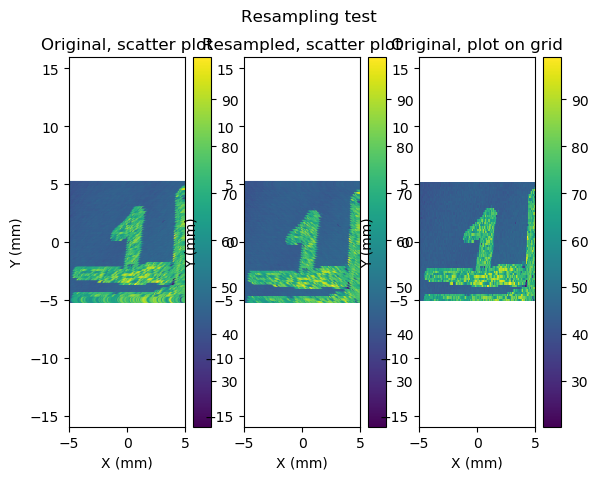

In [17]:
fig=plt.figure(5)
plt.clf()
plt.suptitle('Resampling test')
plt.subplot(131)
plt.title('Original, scatter plot')
plot_points(pts,scatter=1,aspect='equal')
ax1=plt.gca()
plt.subplot(132,sharex=ax1,sharey=ax1)
plt.title('Resampled, scatter plot')
pp=resample_grid(pts,xg,yg)
plot_points(pp,scatter=1,aspect='equal')
plt.subplot(133,sharex=ax1,sharey=ax1)
plt.title('Original, plot on grid')
plot_points(pp,shape=shape,aspect='equal')
plt.savefig(os.path.join(outfolder,'05_resampling.png'))
display(plt.gcf())

resampling...


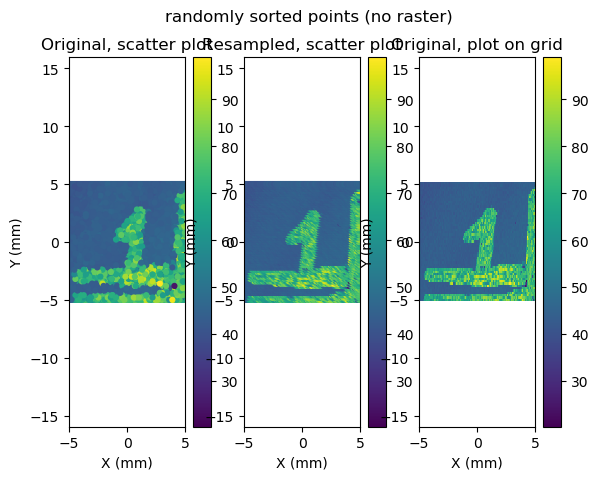

In [18]:
i=np.random.permutation(pts.shape[0])
pts=pts[i,:]

fig=plt.figure(6)
plt.clf()
plt.suptitle('randomly sorted points (no raster)')
plt.subplot(131)
plt.title('Original, scatter plot')
plot_points(pts,scatter=1,aspect='equal')
ax1=plt.gca()
plt.subplot(132,sharex=ax1,sharey=ax1)
plt.title('Resampled, scatter plot')
pp=resample_grid(pts,xg,yg)
plot_points(pp,scatter=1,aspect='equal')
plt.subplot(133,sharex=ax1,sharey=ax1)
plt.title('Original, plot on grid')
plot_points(pp,shape=shape,aspect='equal')
plt.savefig(os.path.join(outfolder,'06_unsorted_points.png'))
display(plt.gcf())

In [19]:
# rebin points

s=(1.,-1,1.) #x fast scanning
pts=get_points(os.path.join(infolder,testfiles[2]),delimiter=',',center=(0,0),scale=s)

fax,shape=points_find_grid(pts)
print (fax)
print (shape)
xr,yr=span(pts[:,0]),span(pts[:,1])
xg=np.linspace(xr[0],xr[1],shape[0])
yg=np.linspace(yr[0],yr[1],shape[1])

0
(112, 51)


resampling...


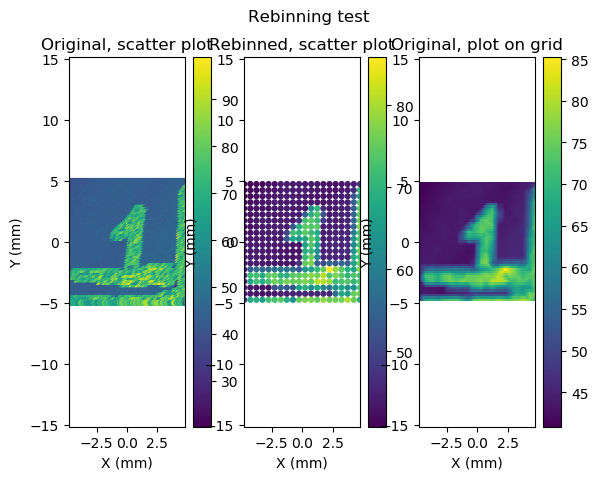

In [20]:
nbins=20

fig=plt.figure(7)
plt.clf()
plt.suptitle('Rebinning test')
plt.subplot(131)
plt.title('Original, scatter plot')
plot_points(pts,scatter=1,aspect='equal')
ax1=plt.gca()
plt.subplot(132,sharex=ax1,sharey=ax1)
plt.title('Rebinned, scatter plot')
pp=rebin_points(pts,bins=nbins)
plot_points(pp,scatter=1,aspect='equal')
plt.subplot(133,sharex=ax1,sharey=ax1)
plt.title('Original, plot on grid')
plot_points(pp,shape=shape,aspect='equal')
plt.savefig(os.path.join(outfolder,'07_rebinning.png'))
display(plt.gcf())

## rotate and rebin

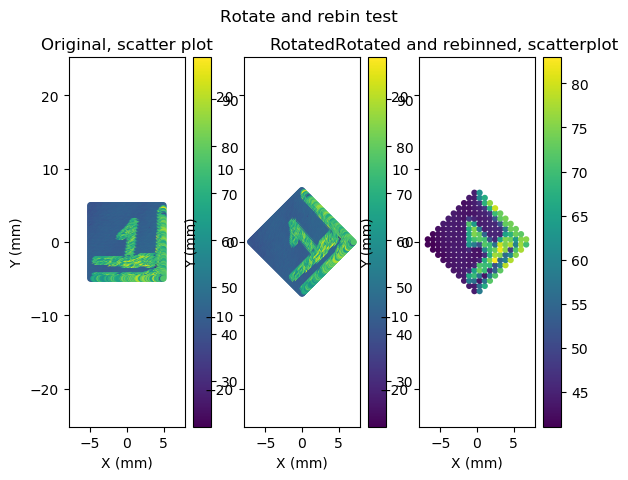

In [21]:
pts2=rotate_points(pts,45*np.pi/180)  #rotate 45 degrees
pts3=rebin_points(pts2,bins=nbins)

fig=plt.figure(8)
plt.clf()
plt.suptitle('Rotate and rebin test')
plt.subplot(131)
plt.title('Original, scatter plot')
plot_points(pts,scatter=1,aspect='equal')
ax1=plt.gca()
plt.subplot(132,sharex=ax1,sharey=ax1)
plt.title('Rotated')
plot_points(pts2,scatter=1,aspect='equal')
plt.subplot(133,sharex=ax1,sharey=ax1)
plt.title('Rotated and rebinned, scatterplot')
plot_points(pts3,scatter=1,aspect='equal')
plt.savefig(os.path.join(outfolder,'08_rotateandrebin.png'))
display(plt.gcf())

In [22]:
plt.close('all')